11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3642 - val_loss: 0.2049
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1985 - val_loss: 0.1778
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1741 - val_loss: 0.1610
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1594 - val_loss: 0.1498
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1490 - val_loss: 0.1421
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1420 - val_loss: 0.1369
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1370 - val_loss: 0.1335
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1337 - val_loss: 0.1311
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1315 - val_loss: 0.1293
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1295 - val_loss: 0.1282
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1288 - val_los

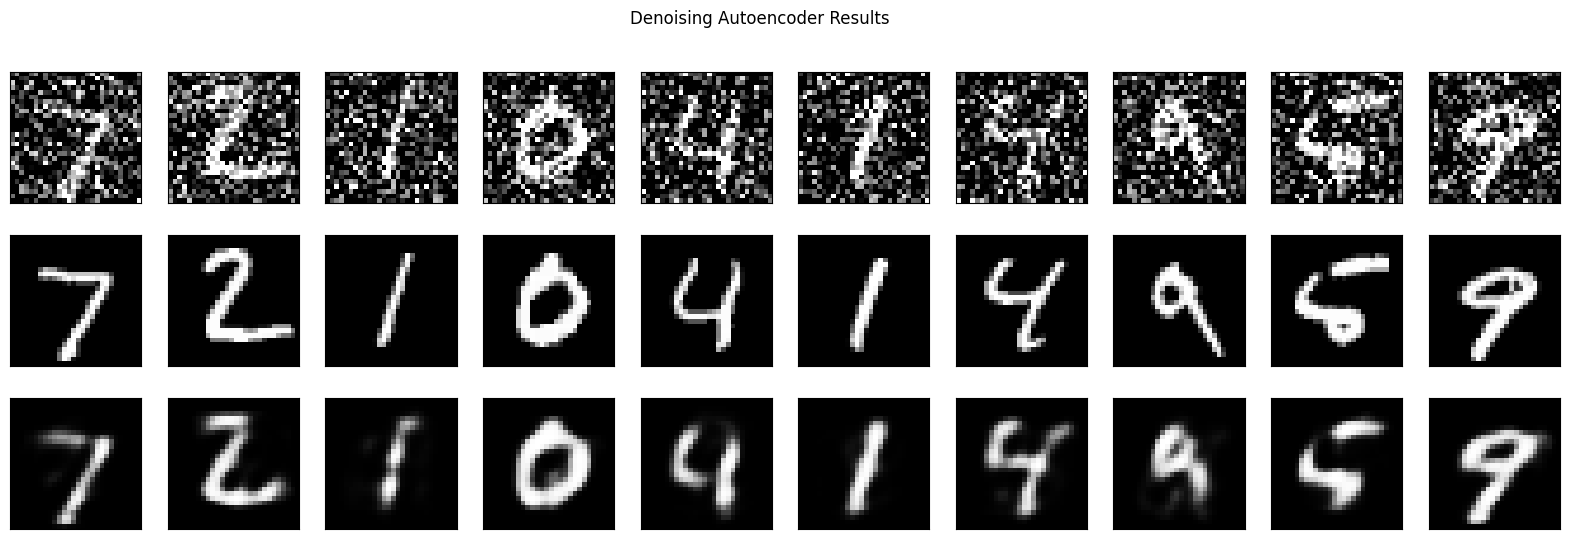

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3837 - val_loss: 0.1924
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1823 - val_loss: 0.1550
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1496 - val_loss: 0.1325
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1305 - val_loss: 0.1198
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1191 - val_loss: 0.1111
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1110 - val_loss: 0.1051
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1051 - val_loss: 0.1008
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1014 - val_loss: 0.0980
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0988 - val_loss: 0.0961
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0972 - val_loss: 0.0948
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0959 - val_loss: 0.0939
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

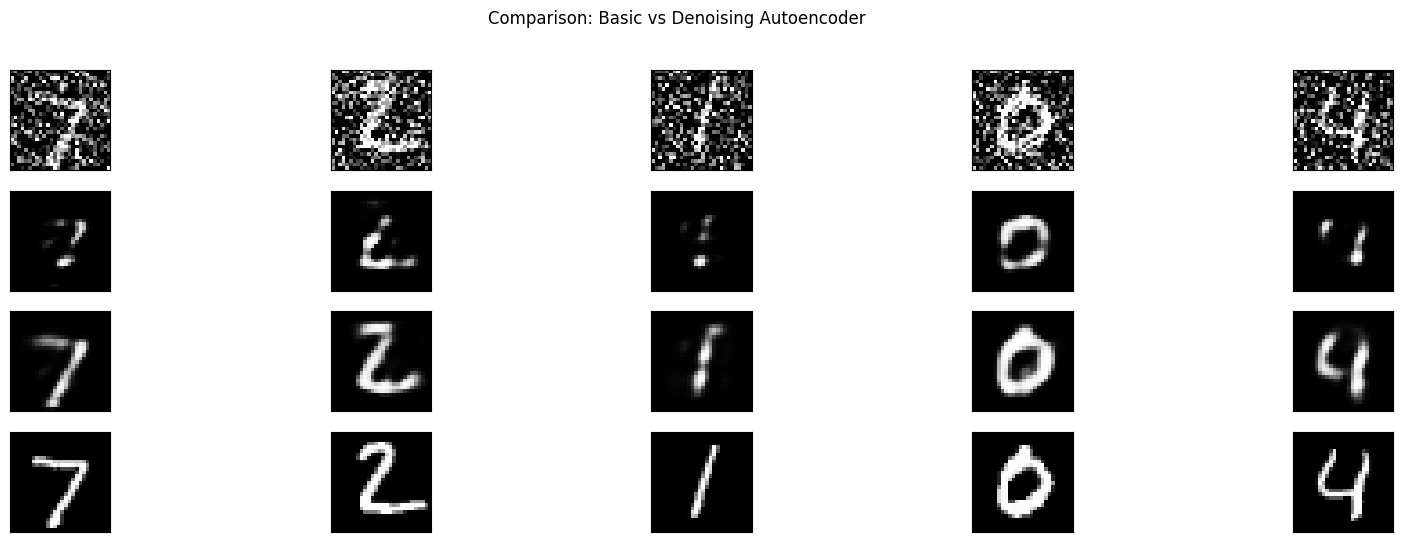

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 1. Load and preprocess MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# 2. Add Gaussian noise to create noisy inputs
def add_noise(images, mean=0, std=0.5):
    noise = np.random.normal(mean, std, size=images.shape)
    noisy_images = images + noise
    # Clip to maintain valid pixel range [0,1]
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

# Create noisy versions of the datasets
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# 3. Build the denoising autoencoder (same architecture as before)
def build_denoising_autoencoder(latent_dim=32):
    # Encoder
    input_img = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu')(input_img)

    # Decoder
    decoded = Dense(784, activation='sigmoid')(encoded)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)

    return autoencoder

# 4. Train the denoising autoencoder
latent_dim = 32
autoencoder = build_denoising_autoencoder(latent_dim)

autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
history = autoencoder.fit(x_train_noisy, x_train,  # Noisy input, clean target
                         epochs=20,
                         batch_size=256,
                         shuffle=True,
                         validation_data=(x_test_noisy, x_test))

# 5. Evaluate and visualize results
def plot_denoising_results(noisy_input, clean_input, reconstructed, n=10):
    plt.figure(figsize=(20, 6))

    for i in range(n):
        # Display noisy input
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy_input[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            plt.ylabel("Noisy Input", size=10)

        # Display clean original
        ax = plt.subplot(3, n, i + n + 1)
        plt.imshow(clean_input[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            plt.ylabel("Clean Original", size=10)

        # Display reconstruction
        ax = plt.subplot(3, n, i + 2*n + 1)
        plt.imshow(reconstructed[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            plt.ylabel("Reconstruction", size=10)

    plt.suptitle('Denoising Autoencoder Results')
    plt.show()

# Get reconstructions
reconstructed_imgs = autoencoder.predict(x_test_noisy)
plot_denoising_results(x_test_noisy, x_test, reconstructed_imgs)

# 6. Compare with basic autoencoder (trained on clean data)
basic_autoencoder = build_denoising_autoencoder(latent_dim)
basic_autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
basic_autoencoder.fit(x_train, x_train,  # Clean input and target
                     epochs=20,
                     batch_size=256,
                     shuffle=True,
                     validation_data=(x_test, x_test))

# Test both models on noisy data
basic_reconstructed = basic_autoencoder.predict(x_test_noisy)
denoising_reconstructed = autoencoder.predict(x_test_noisy)

# Visual comparison
plt.figure(figsize=(20, 6))
for i in range(5):
    # Display noisy input
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        plt.ylabel("Noisy Input", size=10)

    # Display basic AE reconstruction
    ax = plt.subplot(4, 5, i + 6)
    plt.imshow(basic_reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        plt.ylabel("Basic AE", size=10)

    # Display denoising AE reconstruction
    ax = plt.subplot(4, 5, i + 11)
    plt.imshow(denoising_reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        plt.ylabel("Denoising AE", size=10)

    # Display clean original
    ax = plt.subplot(4, 5, i + 16)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        plt.ylabel("Clean Original", size=10)

plt.suptitle('Comparison: Basic vs Denoising Autoencoder')
plt.show()